# Exercices sur les points simples

Objectif : programmer en python

- une fonction pour les connectivités
- une fonction pour les 4-simples
- une fonction pour les 8-simples

In [19]:
#matrice de l'exercice de cours

# oooooooooooo
# oooooooooooo
# oooooxxxxooo
# ooxxxxxxxxoo
# ooooxxxxxooo
# oooxxxxxoooo
# oooooooooooo
# oooooooooooo

matrice = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# réponses pour cette matrice

simple4 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0],
           [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

simple8 = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
           [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
           [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
           [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def show_image(mat):
    plt.imshow(mat, cmap=ListedColormap(['white', 'black']))
    plt.xticks(range(len(mat[0])))
    plt.yticks(range(len(mat))) 
    plt.show()

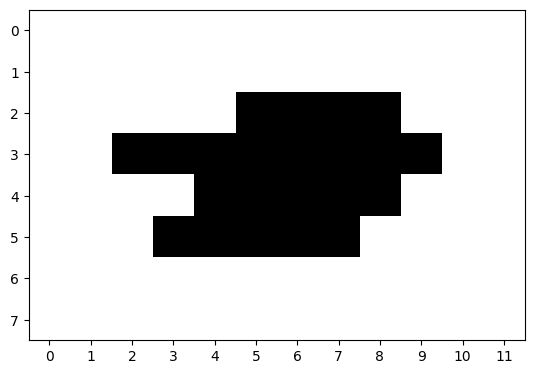

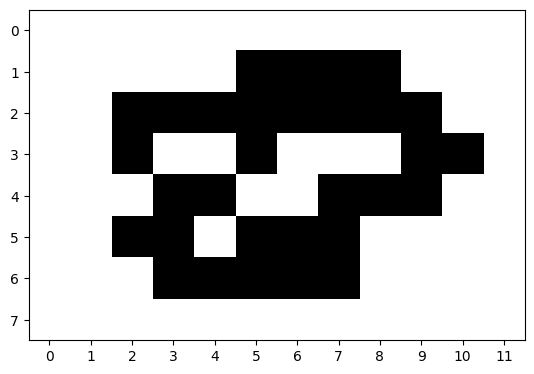

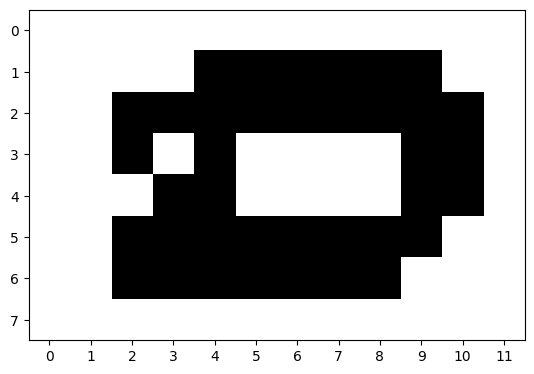

In [21]:
show_image(matrice)
show_image(simple4)
show_image(simple8)

In [ ]:
def neighbors4(point, mat):
    """List of 4 neighbors of point=(x, y) in matrix mat
    (top, right, bottom, left)"""
    x, y = point
    voisins = []
    voisins.append(matrice[y-1][x] if y-1 >= 0 else 0)          # haut
    voisins.append(matrice[y][x+1] if x+1 < len(mat[0]) else 0) # droite
    voisins.append(matrice[y+1][x] if y+1 < len(mat) else 0)    # bas
    voisins.append(matrice[y][x-1] if x-1 >= 0 else 0)          # gauche
    return voisins


def neighbors8(point, mat):
    """List of 8 neighbors of point=(x, y) in matrix mat
    (top-left, clockwise)"""
    x, y = point
    voisins = []
    voisins.append(matrice[y-1][x-1] if y-1 >= 0 and x-1 >= 0 else 0)                   # haut-gauche
    voisins.append(matrice[y-1][x] if y-1 >= 0 else 0)                                  # haut
    voisins.append(matrice[y-1][x+1] if y-1 >= 0 and x+1 < len(mat[0]) else 0)          # haut-droite
    voisins.append(matrice[y][x+1] if x+1 < len(mat[0]) else 0)                         # droite
    voisins.append(matrice[y+1][x+1] if y+1 < len(mat) and x+1 < len(mat[0]) else 0)    # bas-droite
    voisins.append(matrice[y+1][x] if y+1 < len(mat) else 0)                            # bas
    voisins.append(matrice[y+1][x-1] if y+1 < len(mat) and x-1 >= 0 else 0)             # bas-gauche
    voisins.append(matrice[y][x-1] if x-1 >= 0 else 0)                                  # gauche
    return voisins



In [ ]:
def T4(p, matrice):
    voisins = neighbors4(p, matrice)
    # on fait le tour des voisins circulairement
    voisins_circ = voisins + [voisins[0]]
    transitions = 0
    for i in range(4):
        if voisins_circ[i] == 0 and voisins_circ[i+1] == 1:
            transitions += 1
    return transitions



In [ ]:
def is_4_simple(x, y, mat):
    